Importing the **dependencies** **bold text**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

Data Collection and Precessing

In [ ]:
# load the dataset to a pandas dataframe
# url =f'https://drive.google.com/1BYnvLgMRkmtCZ4RGL_LkwQKWpHH4YwKT'

# url = f'https://drive.google.com/uc?id={1BYnvLgMRkmtCZ4RGL_LkwQKWpHH4YwKT}'
# url = f'https://drive.google.com/uc?id={'1BYnvLgMRkmtCZ4RGL_LkwQKWpHH4YwKT'}'
# file_id = '1BYnvLgMRkmtCZ4RGL_LkwQKWpHH4YwKT'
# url = f'https://drive.google.com/uc?id={file_id}'

data = pd.read_csv('/content/Rainfall.csv')

In [ ]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
data.shape

(366, 12)

In [ ]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [ ]:
data.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [ ]:
data['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
print("data.info:")
data.info()

data.info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [ ]:
# remove the extra spaces in all the columns
data.columns = data.columns.str.strip()

In [ ]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [ ]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [ ]:
data.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


In [ ]:
# handle the missing values
data['winddirection'].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [ ]:
data['winddirection'] = data['winddirection'].fillna(data['winddirection'].mode()[0])
data['windspeed'] = data['windspeed'].fillna(data['windspeed'].median())

In [ ]:
data.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


In [ ]:
data['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
# converting yes or no to 1 and 0 respectively
data['rainfall']= data['rainfall'].map({'yes':1, 'no':0})
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


**Exploratory data Analysis (EDA)**

In [ ]:
# setting plot style for all the plots
sns.set(style ='whitegrid')

In [ ]:
data.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [ ]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

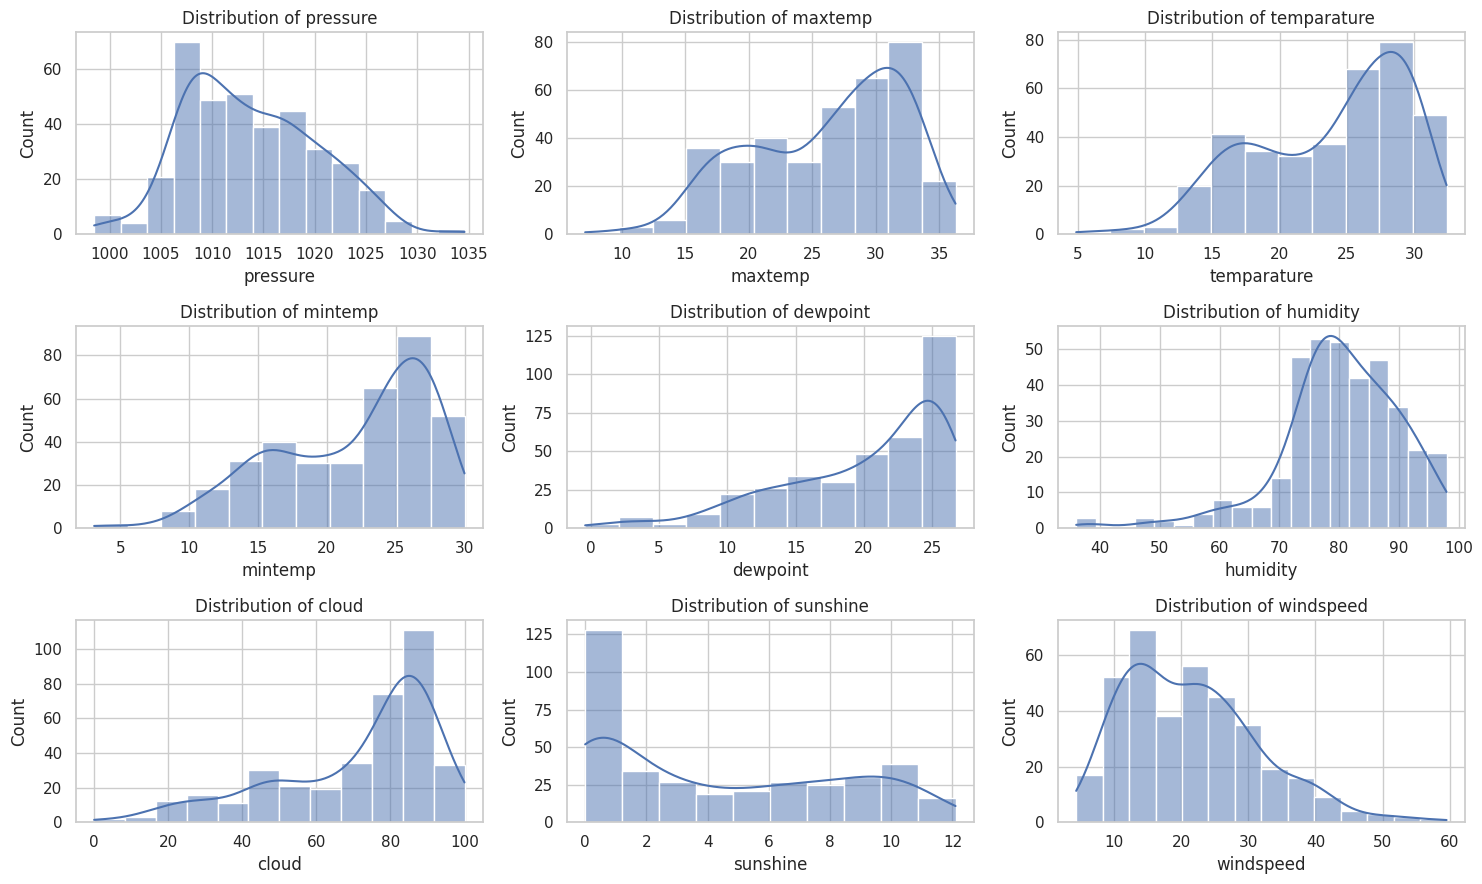

In [ ]:
plt.figure(figsize =(15,9))
for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine',  'windspeed'],1):
  plt.subplot(3,3,i)
  sns.histplot(data[column], kde = True )
  plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

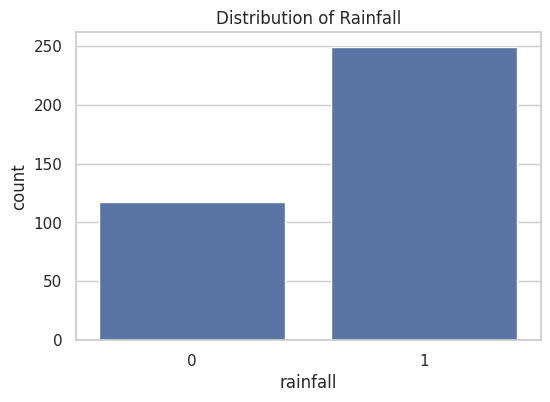

In [ ]:
plt.figure(figsize =(6,4))
sns.countplot(x='rainfall', data = data)
plt.title("Distribution of Rainfall")
plt.show()


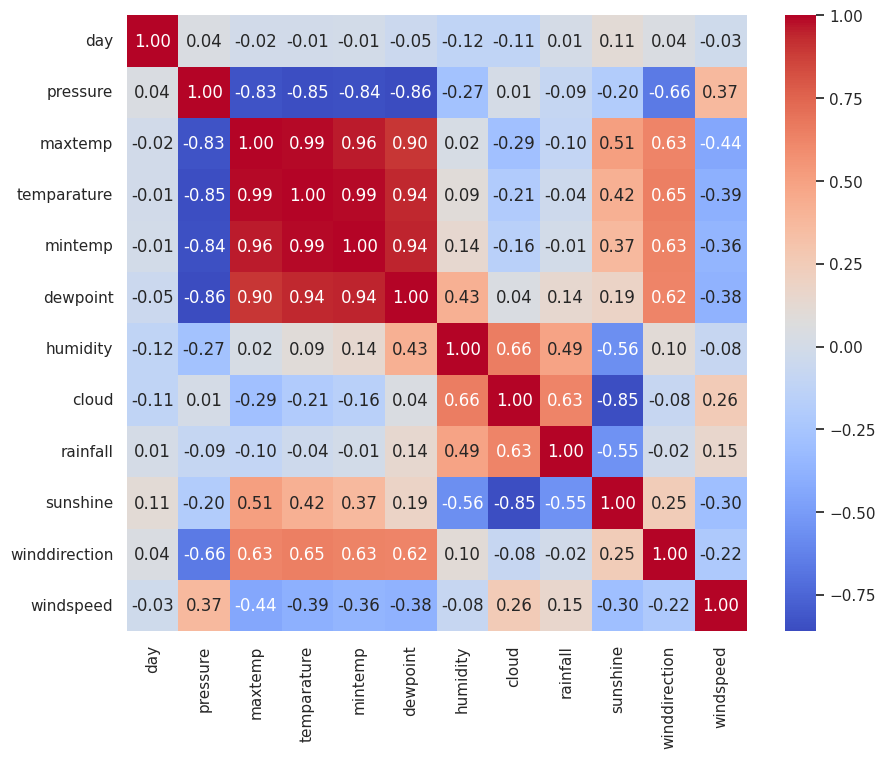

In [ ]:
# correlation matrix
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(),annot= True , cmap = 'coolwarm', fmt = '.2f')
plt.show()

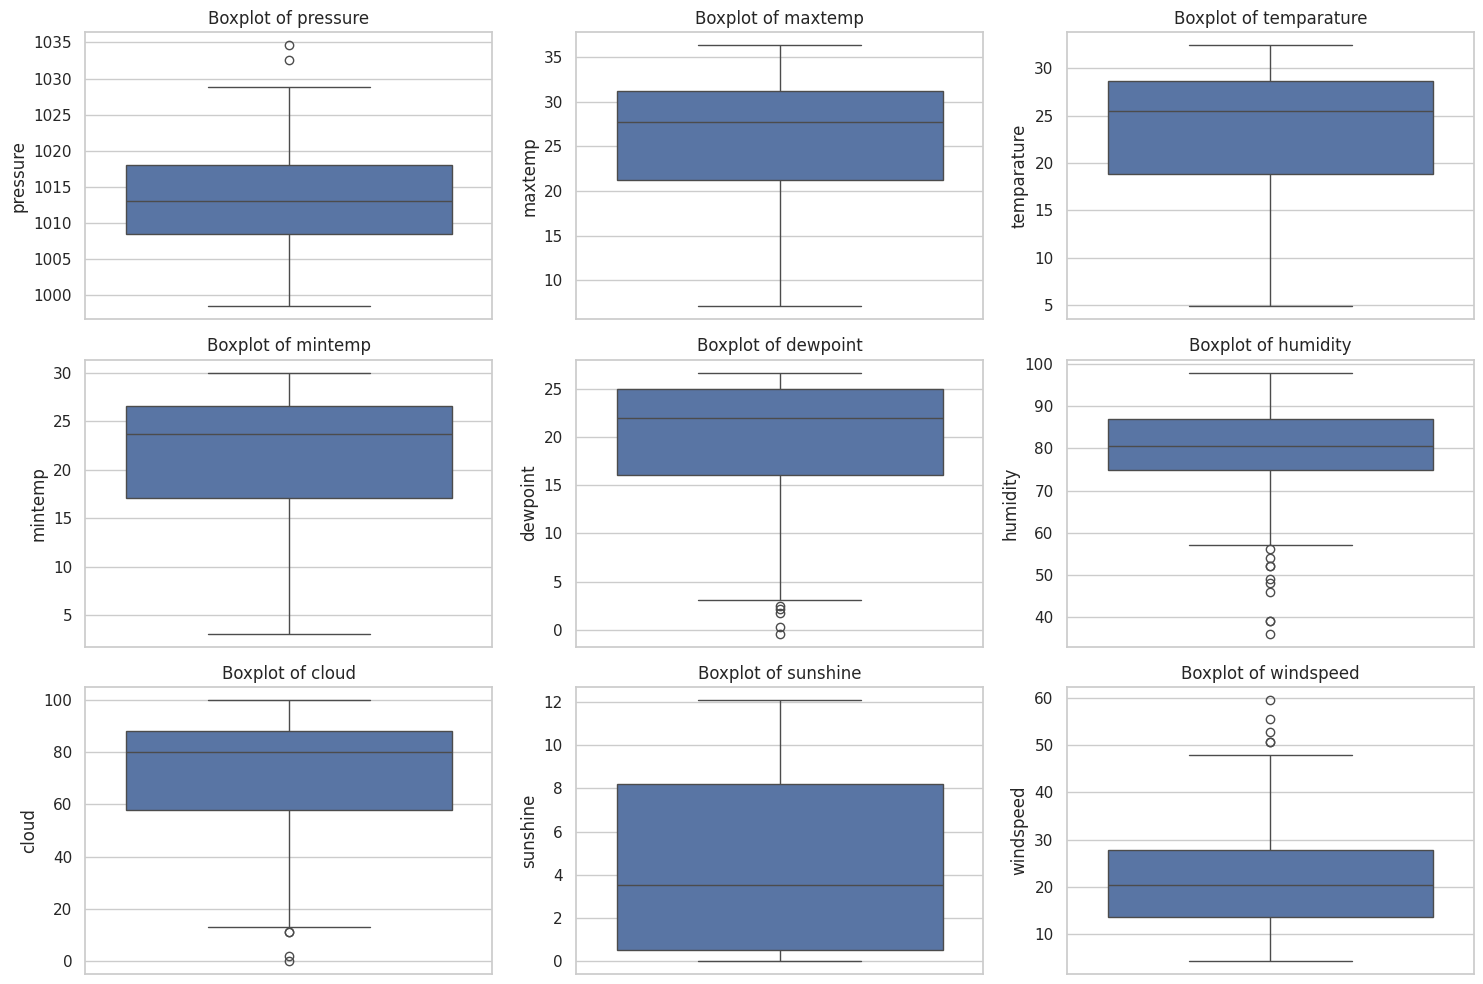

In [ ]:
plt.figure(figsize =(15,10))
for i , column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine',  'windspeed'],1):
  plt.subplot(3,3,i)
  sns.boxplot(data[column])
  plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


**Data Preprocessing**

In [ ]:
data = data.drop(columns =['maxtemp','temparature','mintemp'])
data.head()

,day,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [ ]:
print(data['rainfall'].value_counts())

rainfall
1    249
0    117
Name: count, dtype: int64


In [ ]:
# separate majority and minority class
df_majority = data[data['rainfall']==1]
df_minority = data[data['rainfall']==0]

In [ ]:
print(df_majority.shape)
print(df_minority.shape)

(249, 9)
(117, 9)


In [ ]:
# downsample majority class to minority count
df_majority_downsampled = resample(df_majority, replace = False, n_samples = len(df_minority),random_state= 42)

In [ ]:
df_majority_downsampled.shape

(117, 9)

In [ ]:
df_downsampled = pd.concat([df_majority_downsampled,df_minority])
df_downsampled.head()

,day,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,7,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,10,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,17,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,30,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,6,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [ ]:
df_downsampled = df_downsampled.sample(frac =1 , random_state = 42).reset_index(drop = True)

In [ ]:
df_downsampled.head()

,day,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,8,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,17,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,5,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,26,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,5,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [ ]:
# spitting feature and target as X and y
X = df_downsampled.drop(columns = ['rainfall', 'day'])
y = df_downsampled['rainfall']

In [ ]:
print(X)

     pressure  dewpoint  humidity  cloud  sunshine  winddirection  windspeed
0      1022.2      14.1        78     90       0.0           30.0       28.5
1      1013.4      19.5        69     17      10.5           70.0       12.4
2      1006.1      24.4        74     27      10.8          220.0        8.7
3      1007.6      24.8        85     84       1.8           70.0       34.8
4      1021.2       8.4        66     18      10.1           20.0       24.4
..        ...       ...       ...    ...       ...            ...        ...
229    1008.1      25.4        86     75       5.7           20.0        9.5
230    1010.1      19.9        91     89       0.0           70.0       31.8
231    1020.6      14.7        91     88       0.3           50.0       24.4
232    1008.3      24.1        74     29       5.7           10.0        4.4
233    1005.0      26.1        87     82       2.2          160.0       12.6

[234 rows x 7 columns]


In [ ]:
print(y)

0      1
1      0
2      0
3      1
4      0
      ..
229    1
230    1
231    1
232    0
233    1
Name: rainfall, Length: 234, dtype: int64


In [ ]:
# spliting the data into training data and test data
x_train, x_test, y_train, y_test = train_test_split(X,y , test_size= 0.2 , random_state= 42)


Model Training

In [ ]:
rf_model = RandomForestClassifier(random_state = 42)
param_grid_rf ={
    "n_estimators":[50,100,200],
    "max_features": ['squrt', 'log2'],
    "max_depth": [10,20,30,None],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}



Hypertuning using GridSearchCV

In [ ]:
grid_serach_rf = GridSearchCV(estimator = rf_model, param_grid = param_grid_rf, cv = 5, n_jobs = -1, verbose = 2)
grid_serach_rf.fit(x_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
341 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['squrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
best_rf_model =grid_serach_rf.best_estimator_
print("best paramater for Random Forest:",grid_serach_rf.best_params_ )

best paramater for Random Forest: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [ ]:
cv_scores = cross_val_score(best_rf_model, x_train, y_train, cv = 5 )
print("Cross validation scores:",cv_scores)
print("Mean corss_validation_score", np.mean(cv_scores))

Cross validation scores: [0.68421053 0.81578947 0.83783784 0.83783784 0.91891892]
Mean corss_validation_score 0.818918918918919


In [ ]:
y_pred = best_rf_model.predict(x_test)

print("Test set Accuracy:", accuracy_score(y_test, y_pred))
print("Test set Confusion Matrix: \n", confusion_matrix(y_test, y_pred) )
print("Classification Report: \n", classification_report(y_test,y_pred))

Test set Accuracy: 0.7446808510638298
Test set Confusion Matrix: 
 [[17  7]
 [ 5 18]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47



Prediction on unknown data

In [ ]:
input_data = (1015.9, 19.9, 95, 81, 0.0, 40.0,13.7)
input_df = pd.DataFrame([input_data], columns = X.columns)
print(input_df)

   pressure  dewpoint  humidity  cloud  sunshine  winddirection  windspeed
0    1015.9      19.9        95     81       0.0           40.0       13.7


In [ ]:
prediction = best_rf_model.predict(input_df)
print(prediction)
print("prediction result:", "Rainfall" if prediction[0] == 1 else "No Rainfall")

[1]
prediction result: Rainfall


In [ ]:
# Save model and Feature name to a pickel file
model_data = {"model": best_rf_model, "features_name":X.columns.tolist()}
with open("rainfall_prediction_model.pkl", "wb") as file:
  pickle.dump(model_data,file)

load the saveld model file and use it for prediction

In [ ]:
import pickle
import pandas as pd


In [ ]:
# load the trained model and feature names from the pickel file
with open("rainfall_prediction_model.pkl", "rb") as file:
  model_data = pickle.load(file)

To do :

--> SMOTE for class balancing

--> PCA for dimensionality reduciton

--> Simple modles like logistic Regression (with Feature scaling)


In [ ]:
input_data = {}